# Polynomial Regression

## Importing the libraries

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [37]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:,1:-1].values #  taking all columns from the second to the last excluding the last
y = dataset.iloc[:,-1].values

In [38]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


## Training the Linear Regression model on the whole dataset

In [39]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

## Training the Polynomial Regression model on the whole dataset

In [46]:
from sklearn.preprocessing import PolynomialFeatures
n = 4
poly_reg = PolynomialFeatures(degree = n)  # Where n is the degree of the x (y = b0 + b1x .... + bnx^n)
X_poly = poly_reg.fit_transform(X)
print(X_poly)
lin_reg_2 = LinearRegression()
lin_reg_2 = lin_reg_2.fit(X_poly, y)

[[1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00]
 [1.000e+00 2.000e+00 4.000e+00 8.000e+00 1.600e+01]
 [1.000e+00 3.000e+00 9.000e+00 2.700e+01 8.100e+01]
 [1.000e+00 4.000e+00 1.600e+01 6.400e+01 2.560e+02]
 [1.000e+00 5.000e+00 2.500e+01 1.250e+02 6.250e+02]
 [1.000e+00 6.000e+00 3.600e+01 2.160e+02 1.296e+03]
 [1.000e+00 7.000e+00 4.900e+01 3.430e+02 2.401e+03]
 [1.000e+00 8.000e+00 6.400e+01 5.120e+02 4.096e+03]
 [1.000e+00 9.000e+00 8.100e+01 7.290e+02 6.561e+03]
 [1.000e+00 1.000e+01 1.000e+02 1.000e+03 1.000e+04]]


## Visualising the Linear Regression results

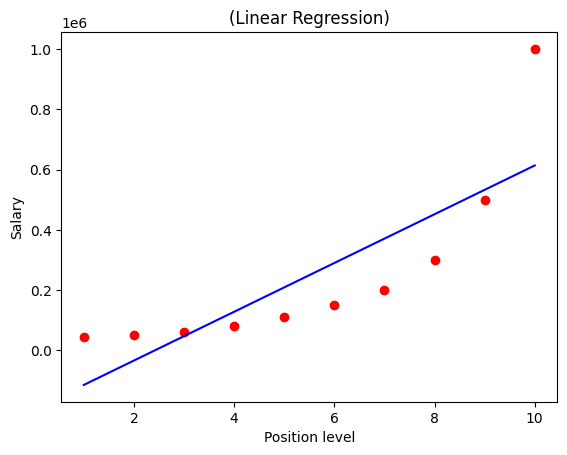

In [47]:
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg.predict(X), color = 'blue')
plt.title('(Linear Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## Visualising the Polynomial Regression results

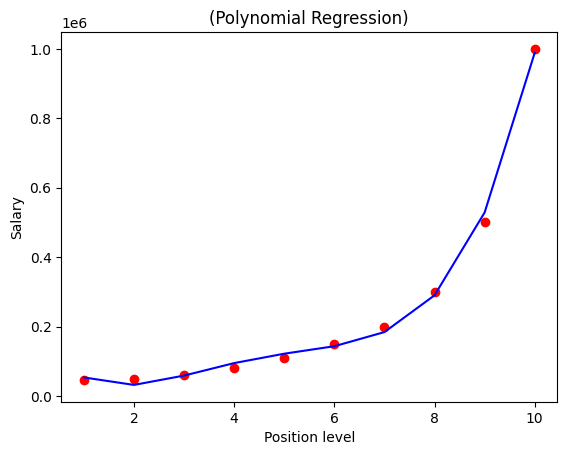

In [48]:
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg_2.predict(X_poly), color = 'blue')
plt.title('(Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## Visualising the Polynomial Regression results (for higher resolution and smoother curve)

<ipython-input-57-4525aef51500>:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.1) # Horizontal


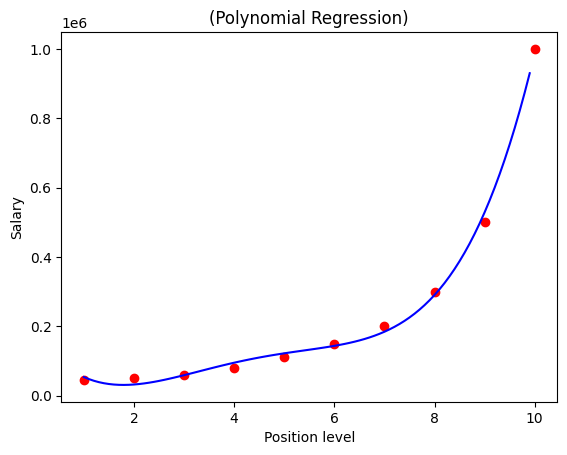

In [57]:
X_grid = np.arange(min(X), max(X), 0.1) # Horizontal array
X_grid = X_grid.reshape(-1, 1) # Vertical (reshape your array with 1 column and as many rows as necessary to accommodate the data) you can replace -1 with len(X_grid)
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.title('(Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## Predicting a new result with Linear Regression

In [43]:
lin_reg.predict([[6.5]])

array([330378.78787879])

## Predicting a new result with Polynomial Regression

In [67]:
lin_reg_2.predict(poly_reg.fit_transform([[6.5]]))

array([158862.45265155])

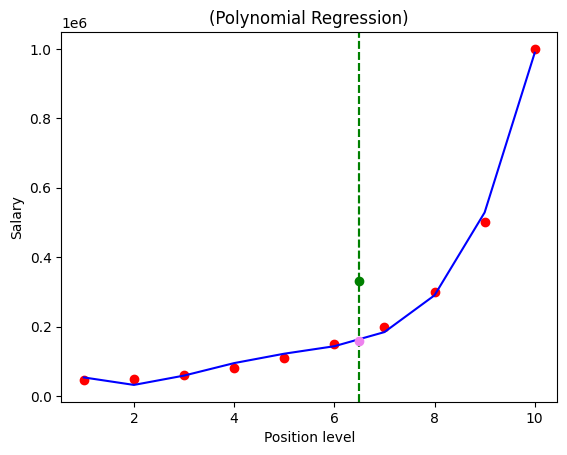

In [73]:
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg_2.predict(X_poly), color = 'blue')
X_pred = 6.5
y_pred = lin_reg.predict([[X_pred]])
y_pred2 = lin_reg_2.predict(poly_reg.fit_transform([[X_pred]]))
plt.scatter(X_pred, y_pred, color = 'green')
plt.axvline(x = X_pred, color = 'green', ls='--')
# ------------------------------------------------------------------------------
plt.scatter(X_pred, y_pred2, color = 'violet', zorder=10) #zorder to bring the point on top (make it visible)
plt.axvline(x = X_pred, color = 'green', ls='--')
plt.title('(Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()